In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from xhistogram.xarray import histogram
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 13
})

In [2]:
dummy = xr.open_mfdataset("/pscratch/sd/a/amahesh/hens/demo_bred_1step/ensemble_out_0000*_2020-06-18-00-00-00.nc",
                     group='global', concat_dim='ensemble', combine='nested')

In [3]:
dates = pd.date_range('2023-06-01', '2023-08-31', freq='D')
intervals = []
for idx, curr_date in enumerate(dates):
    val = xr.open_dataset(f"/pscratch/sd/a/amahesh/hens_h5/stats/t2m_{curr_date:%Y%m%d}_reduced-lead-04-07-10.h5")
    val = val.rename({"phony_dim_2" : 'lat',
                     "phony_dim_3" : 'lon',
                     'phony_dim_1' : 'lead_time',
                     'phony_dim_4' : 'ensemble_size',
                     'phony_dim_5' : 'interval'})
    val['lat'] = dummy['lat']
    val['lon'] = dummy['lon']
    intervals.append(val['t2m_extreme_confidence_interval'][idx])
    print(idx)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


In [4]:
intervals = xr.concat(intervals, dim='initial_time')

In [6]:
width = intervals.sel(interval=1) - intervals.sel(interval=0)

In [7]:
width = width.chunk({'initial_time' : 1, 
                    'ensemble_size' : 1, 
                    'lat' : 100})

In [43]:
width = width * 100 # convert from proportion to probability

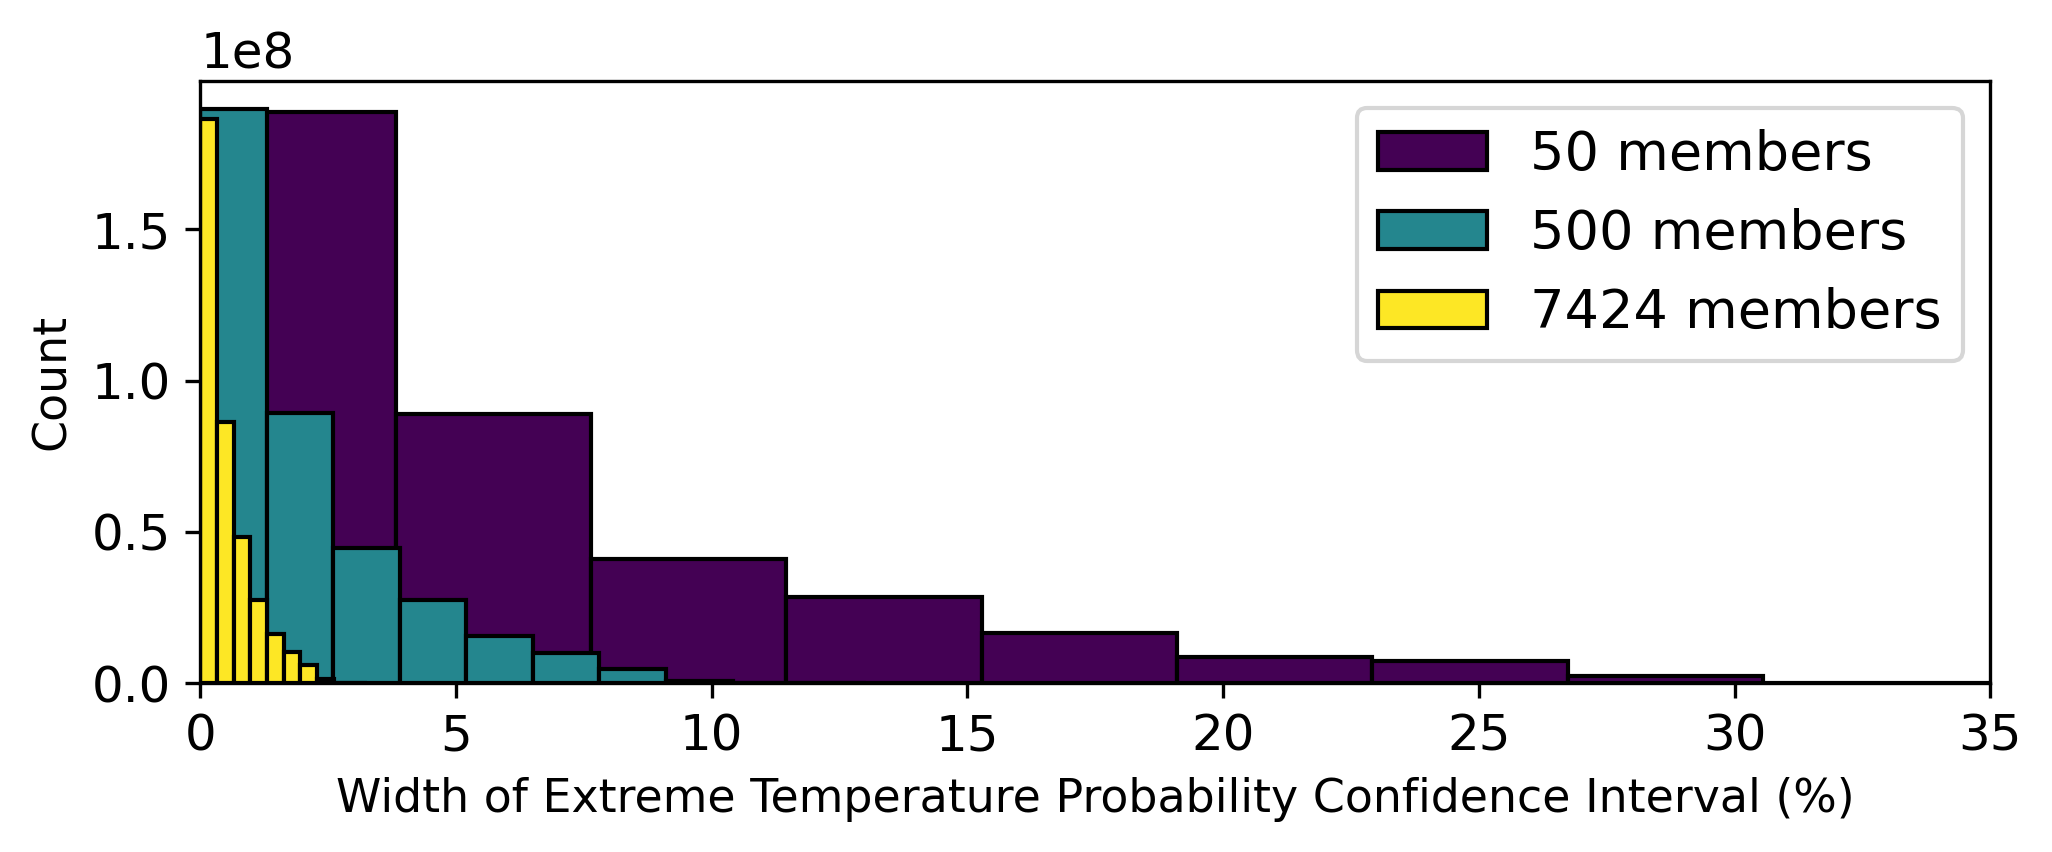

In [64]:
plt.figure(dpi=300, figsize=(7,3))
width.isel(ensemble_size=0, lead_time=[-1, -2, -3, -4]).plot.hist(histtype='bar',  ec='black',label='50 members',
                                                                 color=colors[0])
# width.isel(ensemble_size=1, lead_time=[-1, -2, -3, -4]).plot.hist(histtype='bar',  ec='black', label='100 members',
#                                                                  color=colors[1])
width.isel(ensemble_size=2, lead_time=[-1, -2, -3, -4]).plot.hist(histtype='bar',  ec='black', label='500 members',
                                                                 color=colors[2])
# width.isel(ensemble_size=3, lead_time=[-1, -2, -3, -4]).plot.hist(histtype='bar',  ec='black', label='1000 members',
#                                                                  color=colors[3])
width.isel(ensemble_size=-1, lead_time=[-1, -2, -3, -4]).plot.hist(histtype='bar',ec='black', label='7424 members',
                                                                  color=colors[-1])
plt.legend()
plt.xlabel("Width of Extreme Temperature Probability Confidence Interval (%)")
plt.xlim((0,35))
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("confidence_interval_width_histogram.pdf")

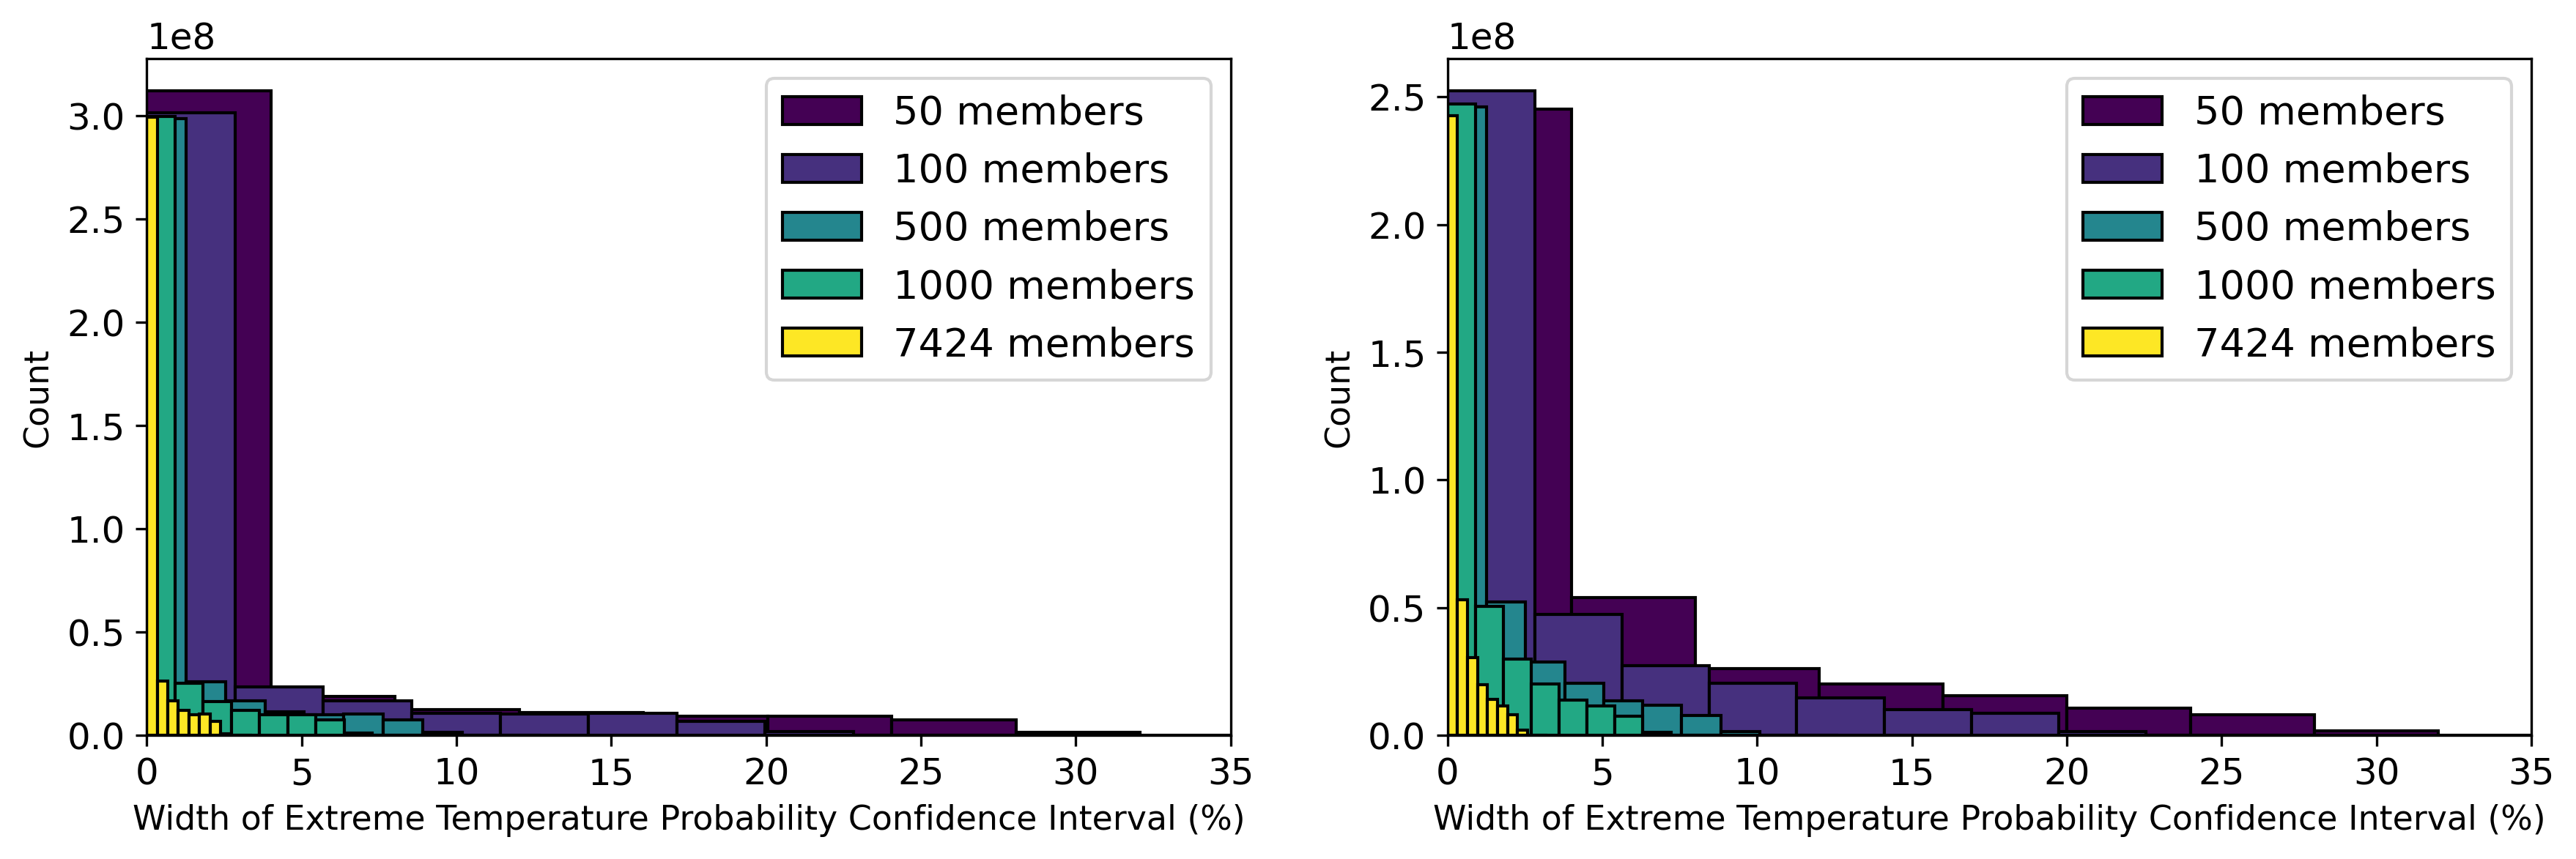

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300, figsize=(14,4))
lead_times = [0, 1, 2, 3]
width.isel(ensemble_size=0, lead_time=lead_times).plot.hist(ax=ax1, histtype='bar',  ec='black',label='50 members',
                                                                 color=colors[0])
width.isel(ensemble_size=1, lead_time=lead_times).plot.hist(ax=ax1,histtype='bar',  ec='black', label='100 members',
                                                                 color=colors[1])
width.isel(ensemble_size=2, lead_time=lead_times).plot.hist(ax=ax1,histtype='bar',  ec='black', label='500 members',
                                                                 color=colors[2])
width.isel(ensemble_size=3, lead_time=lead_times).plot.hist(ax=ax1,histtype='bar',  ec='black', label='1000 members',
                                                                 color=colors[3])
width.isel(ensemble_size=-1, lead_time=lead_times).plot.hist(ax=ax1, histtype='bar',ec='black', label='7424 members',
                                                                  color=colors[-1])
ax1.legend()
ax1.set_xlabel("Width of Extreme Temperature Probability Confidence Interval (%)")
ax1.set_xlim((0,35))
ax1.set_ylabel("Count")

lead_times = [4, 5, 6, 7]
width.isel(ensemble_size=0, lead_time=lead_times).plot.hist(ax=ax2, histtype='bar',  ec='black',label='50 members',
                                                                 color=colors[0])
width.isel(ensemble_size=1, lead_time=lead_times).plot.hist(ax=ax2,histtype='bar',  ec='black', label='100 members',
                                                                 color=colors[1])
width.isel(ensemble_size=2, lead_time=lead_times).plot.hist(ax=ax2,histtype='bar',  ec='black', label='500 members',
                                                                 color=colors[2])
width.isel(ensemble_size=3, lead_time=lead_times).plot.hist(ax=ax2,histtype='bar',  ec='black', label='1000 members',
                                                                 color=colors[3])
width.isel(ensemble_size=-1, lead_time=lead_times).plot.hist(ax=ax2,histtype='bar',ec='black', label='7424 members',
                                                                  color=colors[-1])
ax2.legend()
ax2.set_xlabel("Width of Extreme Temperature Probability Confidence Interval (%)")
ax2.set_xlim((0,35))
ax2.set_ylabel("Count")


plt.savefig("confidence_interval_width_histogram_two_panel.pdf")
